## Questões

### 1. Verificação de Senha Forte

Escreva uma função que recebe uma senha como entrada e verifica se ela atende aos seguintes critérios de uma senha forte:
- Pelo menos 8 caracteres
- Pelo menos uma letra maiúscula e uma letra minúscula
- Pelo menos um dígito
- Pelo menos um caractere especial (por exemplo, !@#$%&*)

A função deve retornar `True` se a senha for forte e `False` caso contrário. Mostre exemplos.

In [2]:
import re 


def check_size(password):
    return len(password) >= 8

def check_uppercase(password):
    return re.search(r'[A-Z]', password) is not None

def check_number(password):
    return re.search(r'[0-9]', password) is not None

def check_special(password):
    return re.search(r'[!@#$%^&*()]', password) is not None

def check_password(password):
    return check_size(password) and check_uppercase(password) and check_number(password) and check_special(password)

password = "@teste123"
print (f"{password} is valid: {check_password(password)}")

@teste123 is valid: False


### 2. Verificação de Endereço de E-mail

Escreva uma função que recebe um endereço de e-mail como entrada e verifica se ele é válido de acordo com as regras básicas de formação de um e-mail. Utilize expressões regulares para realizar a validação. A função deve retornar `True` se o endereço de e-mail for válido e `False` caso contrário. Mostre exemplos.

In [3]:
"""
    definiremos como regra basica os seguintes itens:
    1. Nome do usuário: Pode conter letras (a-z), números (0-9), pontos (.), sublinhados (_) e hifens (-). Não pode começar ou terminar com ponto, sublinhado ou hífen.
    
    2. Símbolo @: Este símbolo separa o nome do usuário do domínio.

    3. Nome do domínio: Consiste em um nome de domínio seguido por um ponto e um sufixo de domínio (como .com, .org, .net). O domínio pode conter letras, números, hifens e deve terminar com um sufixo de domínio válido.
"""

def check_email(email):
    r = r"^[a-zA-Z0-9]{1}[a-zA-Z0-9._-]*@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"
    return re.search(r, email) is not None
print(f" Email ecaf@ic.ufal.br is valad: {check_email("ecaf@ic.ufal.br")}")

 Email ecaf@ic.ufal.br is valad: True


### 3. Extração de Informações de Referência Bibliográfica

Considere o seguinte exemplo de referência de livro em formato de citação APA:

`Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.`


Implemente uma função usando expressões regulares que extraia cada autor, ano de publicação, título e editora do livro, para qualquer referência de livro neste formato.

In [4]:
import re 


# Devido a falta de exemplos, interplei os exemplo validor para exercicio estremamente analogo ao dado.
text = "Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press."
def search_author(text):
    r = r"^[A-Z][^(]*" # Pega uma letra mauscula e tudo que vem em seguida até (.
    return re.findall(r, text)

def search_year_publication(text):
    r = r"\(([^)])*\)" # Pega esta dentro dos  ( ).
    return re.search(r, text).group()

def search_title(text):
    r = r"[A-Z][a-z\s]+\." # Nesse caso a padrão observado foi a falta de virgula
    return re.findall(r, text)[0]

def search_company(text):
    r = r"[A-Z][a-z\s]+\.$" # Analogo ao item anterior, porem termina com ponto.
    return re.findall(r, text)

print(search_author(text))
print(search_year_publication(text))
print(search_title(text))
print(search_company(text))

['Manning, C. D., Manning, C. D., & Schutze, H. ']
(1999)
Foundations of statistical natural language processing.
['T press.']


### 4. Distribuição de Comprimentos dos Textos

Usando sua base de textos, determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.


,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


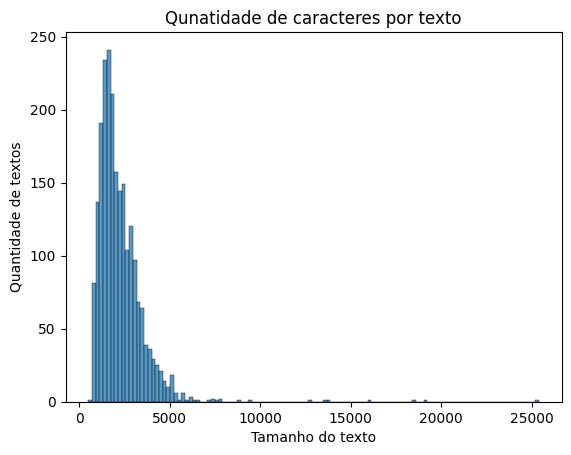

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/bbc_data.csv")
texts_size = [ len (x) for x in df["data"] ]
display(df)

sns.histplot(texts_size)
plt.title("Qunatidade de caracteres por texto")
plt.xlabel("Tamanho do texto")
plt.ylabel("Quantidade de textos")
plt.show()

### 5. Pré-processamento de Textos

Aplique os seguintes passos de pré-processamento aos textos:
- Remova todas as palavras que contêm números;
- Converta as palavras para minúsculas;
- Remova pontuação;
- Tokenize os textos em palavras, gerando um dicionário único com n tokens e convertendo cada texto em um vetor de dimensão n com a respectiva contagem de palavras.

Em seguida, encontre as 10 palavras mais frequentes da base de textos.

In [6]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


df["clean_text"] = df["data"].apply(lambda x: re.sub(r"[^a-zA-Z]", " ", x)) # Remoção de pontuação e numeros
df["clean_text"] = df["clean_text"].apply(lambda x: x.lower()) 
#df["clean_text"] = df["data"].apply(lambda x: word_tokenize(x))


cv = CountVectorizer()
X = cv.fit_transform(df["clean_text"])
token_counts_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
token_counts_df

,aa,aaa,aaas,aac,aadc,aaliyah,aaliyahs,aaltra,aamir,aara,...,zornotza,zorro,zs,zubair,zuluaga,zurich,zurichs,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Pré-processamento Avançado de Textos

Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:
- Remova stopwords;
- Realize rotulação de POS;
- Realize stemização;

1. Exiba os resultados em alguns textos.
2. Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.
3. Repita a etapa 2 usando os tokens stemizados.
4. Verifique quais são as classes gramaticais mais frequentes.

In [7]:
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.tag import pos_tag

stemmer = LancasterStemmer()

stop_words = stopwords.words("english")

df["clean_text"] = df["clean_text"].apply(lambda x: word_tokenize(x)) # Tokenização
df["clean_text_2"] =  df["clean_text"].apply(lambda x: [word for word in x if word not in stop_words]) # Remoção de stop word

df["clean_text_2"] = df["clean_text_2"].apply(lambda x: [stemmer.stem(word) for word in x ]) # Stemização
df["pos_tag"] = df["clean_text_2"].apply(lambda x:pos_tag(x))
df



,data,labels,clean_text,clean_text_2,pos_tag
0,Musicians to tackle US red tape Musicians gro...,entertainment,"[musicians, to, tackle, us, red, tape, musicia...","[mus, tackl, us, red, tap, mus, group, tackl, ...","[(mus, NN), (tackl, VBZ), (us, PRP), (red, JJ)..."
1,"U2s desire to be number one U2, who have won ...",entertainment,"[u, s, desire, to, be, number, one, u, who, ha...","[u, desir, numb, on, u, three, prestigy, gramm...","[(u, JJ), (desir, NN), (numb, NN), (on, IN), (..."
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,"[rocker, doherty, in, on, stage, fight, rock, ...","[rock, doherty, stag, fight, rock, sing, pet, ...","[(rock, NN), (doherty, NN), (stag, NN), (fight..."
3,Snicket tops US box office chart The film ada...,entertainment,"[snicket, tops, us, box, office, chart, the, f...","[snicket, top, us, box, off, chart, film, adap...","[(snicket, NN), (top, VB), (us, PRP), (box, VB..."
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,"[oceans, twelve, raids, box, office, oceans, t...","[oc, twelv, raid, box, off, oc, twelv, crim, c...","[(oc, JJ), (twelv, NN), (raid, VBD), (box, NN)..."
...,...,...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,"[warning, over, windows, word, files, writing,...","[warn, window, word, fil, writ, microsoft, wor...","[(warn, NN), (window, NN), (word, NN), (fil, N..."
2221,Fast lifts rise into record books Two high-sp...,tech,"[fast, lifts, rise, into, record, books, two, ...","[fast, lift, ris, record, book, two, high, spe...","[(fast, RB), (lift, JJ), (ris, NN), (record, N..."
2222,Nintendo adds media playing to DS Nintendo is...,tech,"[nintendo, adds, media, playing, to, ds, ninte...","[nintendo, ad, med, play, ds, nintendo, releas...","[(nintendo, JJ), (ad, NN), (med, VBD), (play, ..."
2223,Fast moving phone viruses appear Security fir...,tech,"[fast, moving, phone, viruses, appear, securit...","[fast, mov, phon, virus, appear, sec, firm, wa...","[(fast, RB), (mov, JJ), (phon, NN), (virus, NN..."


In [8]:
# Resultado de alguns textos após ralização da protocolo estabelecido 
df["clean_text_2"].head()

0    [mus, tackl, us, red, tap, mus, group, tackl, ...
1    [u, desir, numb, on, u, three, prestigy, gramm...
2    [rock, doherty, stag, fight, rock, sing, pet, ...
3    [snicket, top, us, box, off, chart, film, adap...
4    [oc, twelv, raid, box, off, oc, twelv, crim, c...
Name: clean_text_2, dtype: object

In [9]:
# Comparando os textos obtidos na questão 5 com 6.
from collections import Counter

cnt1 = Counter()
cnt2 = Counter()

for _, row in df.iterrows():
    for word in row["clean_text"]:
        cnt1[word] += 1
    for word in row["clean_text_2"]:
        cnt2[word] += 1


print("With stop words:",cnt1.most_common(10))
print("Without stop words:",cnt2.most_common(10))

With stop words: [('the', 52636), ('to', 25113), ('of', 20008), ('and', 18612), ('a', 18342), ('in', 17734), ('for', 8945), ('is', 8555), ('that', 8055), ('on', 7624)]
Without stop words: [('said', 7255), ('us', 4152), ('year', 3319), ('mr', 3005), ('would', 2581), ('new', 2523), ('also', 2156), ('play', 2053), ('peopl', 2046), ('on', 1985)]


In [10]:
# Classes gramaticais mais frequentes

cnt3 = Counter()

for row in df["pos_tag"]:
    for _, tag in row:
        cnt3[tag] += 1
cnt3.most_common(10)

[('NN', 274838),
 ('JJ', 93394),
 ('VBP', 23878),
 ('VBD', 20576),
 ('RB', 12702),
 ('VB', 12168),
 ('IN', 10406),
 ('NNS', 8564),
 ('MD', 5516),
 ('PRP', 4444)]

### 7. Similaridade de Documentos

Escolha 5 documentos da sua base pré-processada e determine seu documento mais parecido, dentre todos os documentos da base (não pode ser ele mesmo), usando:
- Representação vetorial CountVectorizer com similaridade do cosseno;
- Representação vetorial TF-IDF com similaridade do cosseno.

Justifique, para cada par de documentos mais parecidos, porque cada representação considerou o par semelhante.

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


all_text = df["clean_text_2"].apply(lambda x: " ".join(x))
index_text = [13, 22, 55, 100, 222]

# Bang of words
cv = CountVectorizer()
X = cv.fit_transform(all_text) 

# TF-IDF
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(all_text)

# Calcula a similaridade do coseno para cada texto vetorizado com o bag of words e TF-IDF
for index in index_text:
    text = " ".join(df["clean_text_2"][index])
    
    vector_index_1 = cv.transform([text])
    df[f"resu_bang_{index}"] = cosine_similarity(X, vector_index_1)
    
    vector_index_2 = cv_tfidf.transform([text])
    df[f"resu_tfidf_{index}"] = cosine_similarity(X, vector_index_2)

,data,labels,clean_text,clean_text_2,pos_tag,similaruty_with_L,resu_bang_of_words,resu_tfidf,resu_bang_13,resu_tfidf_13,resu_bang_22,resu_tfidf_22,resu_bang_55,resu_tfidf_55,resu_bang_100,resu_tfidf_100,resu_bang_222,resu_tfidf_222
0,Musicians to tackle US red tape Musicians gro...,entertainment,"[musicians, to, tackle, us, red, tape, musicia...","[mus, tackl, us, red, tap, mus, group, tackl, ...","[(mus, NN), (tackl, VBZ), (us, PRP), (red, JJ)...",0.120856,0.120856,0.081120,0.120856,0.099512,0.164952,0.122007,0.130270,0.053119,0.091748,0.050343,0.211770,0.112529
1,"U2s desire to be number one U2, who have won ...",entertainment,"[u, s, desire, to, be, number, one, u, who, ha...","[u, desir, numb, on, u, three, prestigy, gramm...","[(u, JJ), (desir, NN), (numb, NN), (on, IN), (...",0.268658,0.268658,0.230675,0.268658,0.258899,0.125068,0.093538,0.158942,0.075101,0.156810,0.098489,0.420506,0.331885
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,"[rocker, doherty, in, on, stage, fight, rock, ...","[rock, doherty, stag, fight, rock, sing, pet, ...","[(rock, NN), (doherty, NN), (stag, NN), (fight...",0.135413,0.135413,0.080250,0.135413,0.118418,0.121141,0.088845,0.078682,0.043764,0.098164,0.076218,0.172527,0.149963
3,Snicket tops US box office chart The film ada...,entertainment,"[snicket, tops, us, box, office, chart, the, f...","[snicket, top, us, box, off, chart, film, adap...","[(snicket, NN), (top, VB), (us, PRP), (box, VB...",0.320833,0.320833,0.170831,0.320833,0.262315,0.102402,0.067539,0.133200,0.071759,0.202174,0.139985,0.139799,0.076377
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,"[oceans, twelve, raids, box, office, oceans, t...","[oc, twelv, raid, box, off, oc, twelv, crim, c...","[(oc, JJ), (twelv, NN), (raid, VBD), (box, NN)...",0.174809,0.174809,0.081178,0.174809,0.133502,0.070753,0.049351,0.128801,0.071260,0.127457,0.079045,0.123930,0.069977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,"[warning, over, windows, word, files, writing,...","[warn, window, word, fil, writ, microsoft, wor...","[(warn, NN), (window, NN), (word, NN), (fil, N...",0.013470,0.013470,0.007062,0.013470,0.010121,0.019460,0.014383,0.112325,0.058180,0.042334,0.015818,0.055548,0.025895
2221,Fast lifts rise into record books Two high-sp...,tech,"[fast, lifts, rise, into, record, books, two, ...","[fast, lift, ris, record, book, two, high, spe...","[(fast, RB), (lift, JJ), (ris, NN), (record, N...",0.033488,0.033488,0.015523,0.033488,0.026294,0.043984,0.025180,0.084052,0.033956,0.036450,0.016434,0.089881,0.045290
2222,Nintendo adds media playing to DS Nintendo is...,tech,"[nintendo, adds, media, playing, to, ds, ninte...","[nintendo, ad, med, play, ds, nintendo, releas...","[(nintendo, JJ), (ad, NN), (med, VBD), (play, ...",0.046178,0.046178,0.020157,0.046178,0.033665,0.085454,0.055967,0.104075,0.045895,0.060472,0.032363,0.102791,0.063325
2223,Fast moving phone viruses appear Security fir...,tech,"[fast, moving, phone, viruses, appear, securit...","[fast, mov, phon, virus, appear, sec, firm, wa...","[(fast, RB), (mov, JJ), (phon, NN), (virus, NN...",0.027106,0.027106,0.008879,0.027106,0.018113,0.038074,0.019736,0.101183,0.046578,0.053245,0.022457,0.080980,0.042389


In [68]:
# Analize do texto 13
display(pd.merge( df["resu_bang_13"].nlargest(), df["resu_tfidf_13"].nlargest(), left_index=True, right_index=True))
print(f"Texto 13: {df['data'][13]}", end="\n\n")
print(f"Texto 231: {df['data'][231]}", end="\n\n")

,resu_bang_13,resu_tfidf_13
13,1.000000,0.941156
23,1.000000,0.941156
231,0.653638,0.620446
172,0.637771,0.550715
348,0.635681,0.574868


Texto 13: Brits return Keane to number one  Brits success has helped return Keanes award-winning album Hopes and Fears back to the top of the UK album chart.  The debut album, which took the best British album title at the Brits on Tuesday, moved up seven places from number eight to number one. Also capitalising on Brits success were the Scissor Sisters whose eponymous album moved three places to number two. U2s latest single Sometimes You Cant Make It On Your Own took the top spot in the singles chart, ahead of Elvis. The track, from their current album How To Dismantle An Atomic Bomb, pushed Eminems Like Toy Soldiers from number one to number three.  Elvis Wooden Heart, which entered the chart at number two, is the sixth in a series of 18 reissues to mark the 70th anniversary of Presleys birth. There are currently six re-released Elvis tracks occupying spots in the top 40 singles chart including Are You Lonesome Tonight at number 20, Its Now or Never at number 27 and Jailhouse Rock a

In [72]:
# Analize do texto 22
display(pd.merge( df["resu_bang_22"].nlargest(), df["resu_tfidf_22"].nlargest(), left_index=True, right_index=True))
print(f"Texto 22: {df['data'][22]}", end="\n\n")
print(f"Texto 152: {df['data'][152]}", end="\n\n")

,resu_bang_22,resu_tfidf_22
22,1.000000,0.931819
152,0.634387,0.512353
218,0.552240,0.471005
307,0.514651,0.378844


Texto 22: The Producers scoops stage awards  The Producers has beaten Mary Poppins in the battle of the blockbuster West End musicals at the Olivier Awards.  The Producers won three prizes at the UKs most prestigious annual theatre awards, while Mary Poppins won two. Mel Brooks hit show triumphed in the battle for best new musical, where it was up against Mary Poppins and Andrew Lloyd Webbers The Woman in White. Alan Bennetts The History Boys was the big winner in the straight theatre categories, picking up three trophies. But all eyes were on the musical prizes after The Producers, Mary Poppins and The Woman in White all had high-profile openings in the last six months.  The Producers Nathan Lane, a last-minute replacement for Richard Dreyfuss, beat his former co-star Lee Evans to win best musical actor. Lane has already left the production. A smash hit on Broadway before moving to London, the show also won best musical performance in a supporting role for Conleth Hill, who plays dire

In [76]:
# Analize do texto 55
display(pd.merge( df["resu_bang_55"].nlargest(), df["resu_tfidf_55"].nlargest(), left_index=True, right_index=True))
print(f"Texto 55: {df['data'][55]}", end="\n\n")
print(f"Texto 1958: {df['data'][1958]}", end="\n\n")

,resu_bang_55,resu_tfidf_55
55,1.000000,0.876731
1958,0.301987,0.151973
1934,0.277543,0.154500


Texto 55: Corbett attacks dumbed-down TV  Ronnie Corbett has joined fellow comedy stars Victoria Wood and David Jason in attacking the declining standards of British television programmes.  Speaking to the Radio Times, the Two Ronnies star said there is too much bad language and reality TV. "You get fed up watching shows with not much care and love," he complained. Corbett, soon to reunite with Ronnie Barker for a new Two Ronnies series, also criticised quiz shows like the BBCs They Think Its All Over. "Its just laughing at each other and thinking, Arent we clever?" said the 74-year-old comedian. Corbett is the latest comedy star to bemoan the "dumbing down" of modern TV programmes. In an interview published in the Radio Times in January, Victoria Wood slated comedian Sacha Baron Cohen for his character Ali Gs "horrible" brand of "victim" humour.  "With so many good writers and good performers, its a shame people cant just write a script and have other people learn it," she said. And l

In [78]:
# Analize do texto 100
display(pd.merge( df["resu_bang_100"].nlargest(), df["resu_tfidf_100"].nlargest(), left_index=True, right_index=True))
print(f"Texto 100: {df['data'][100]}", end="\n\n")
print(f"Texto 181: {df['data'][181]}", end="\n\n")

,resu_bang_100,resu_tfidf_100
100,1.000000,0.938325
181,0.376518,0.259573
47,0.327110,0.217178
71,0.300692,0.202667


Texto 100: Lopez misses UK charity premiere  Jennifer Lopez cancelled an appearance at the UK charity premiere of her new movie saying she was too ill to fly.  The actress and singer dropped out at the last minute and has now cancelled all European promotion of the film Shall We Dance? and her new album. She said: "I very much wanted to be in London but unfortunately Im not well. At the advice of my doctors Im unable to travel." Co-star Richard Gere attended the event held in aid of the tsunami appeal. Thousands braved the cold weather to see the stars in Londons Leicester Square. The red carpet boasted waltzing dancers in honour of the films ballroom dancing theme. The films director Peter Chelsom said he was disappointed that Lopez did not attend.  "Its a shame. I know its true that shes not well because she has also cancelled her promotional tour. Ive heard she has swollen glands." Gere, 55, greeted the crowd and signed autographs, accompanied by his wife Carey Lowell. Other stars w

In [80]:
# Analize do texto 222
display(pd.merge( df["resu_bang_222"].nlargest(), df["resu_tfidf_222"].nlargest(), left_index=True, right_index=True))
print(f"Texto 222: {df['data'][222]}", end="\n\n")
print(f"Texto 329: {df['data'][329]}", end="\n\n")

,resu_bang_222,resu_tfidf_222
222,1.000000,0.936270
329,0.422688,0.339609
74,0.421096,0.335022
195,0.421096,0.335022
1,0.420506,0.331885


Texto 222: Franz Ferdinands art school lesson  Scottish rock band Franz Ferdinand, who shot to prominence in 2004, have won two Brit Awards.  With their self-titled debut, Franz Ferdinand have achieved what most rock bands crave - high credibility and critical acclaim while also selling stacks of CDs. They have risen to the head of the UKs art rock ranks with an album of songs that are catchy, creative and original enough to sound fresh. With a cool, spiky, fun sound previously associated with bands like Talking Heads, they hit upon a style that had been out of fashion for a while and so was ripe for another airing. Their first UK single hit number three last January, followed by two more top 20 hits, while the album has sold more than 600,000 copies in 11 months on release. In September it was named album of the year winning the prestigious Mercury Music Prize.  On the festivals circuit, they have been one of the main attractions for huge crowds at Glastonbury, T in the Park and Readi